# Deep Learning Coursework

##### First we import the useful libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import time
import pandas as pd
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import LeakyReLU
from itertools import product


##### Then we create a data_path to be able to download the data easily when we need to 

In [3]:
DATA_PATH = "/Users/arthur/Documents/STUDY/Imperial/Deep Learning /Project/DL-2024-CW-data/Data_A.csv"
data = pd.read_csv(DATA_PATH, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,693200.0,126,692800.0,110,693300.0,50,692700.0,165,693400.0,...,50,693500.0,50,692500.0,250,0,1,0,1,0
1,0,650400.0,501,650200.0,106,650500.0,245,650100.0,259,650600.0,...,328,650700.0,141,649900.0,277,0,0,1,1,1
2,1,636200.0,153,635800.0,150,636300.0,100,635700.0,15,636400.0,...,110,636500.0,105,635500.0,201,0,1,0,1,0
3,0,724800.0,4,724500.0,14,724900.0,50,724300.0,312,725100.0,...,100,725200.0,379,724100.0,56,1,0,0,1,1
4,0,622900.0,110,622700.0,100,623000.0,523,622600.0,300,623100.0,...,249,623200.0,605,622400.0,200,1,0,1,1,0


##### Lets rename the dataset 

In [6]:
COLUMN_NAMES = [
    "label",
    "sell_side_l1_price", "sell_side_l1_volume",
    "buy_side_l1_price", "buy_side_l1_volume",
    "sell_side_l2_price", "sell_side_l2_volume",
    "buy_side_l2_price", "buy_side_l2_volume",
    "sell_side_l3_price", "sell_side_l3_volume",
    "buy_side_l3_price", "buy_side_l3_volume",
    "sell_side_l4_price", "sell_side_l4_volume",
    "buy_side_l4_price", "buy_side_l4_volume",
    "prev_change_1", "prev_change_2", "prev_change_3", 
    "prev_change_4", "prev_change_5"
]

data.columns = COLUMN_NAMES
data.describe()

,label,sell_side_l1_price,sell_side_l1_volume,buy_side_l1_price,buy_side_l1_volume,sell_side_l2_price,sell_side_l2_volume,buy_side_l2_price,buy_side_l2_volume,sell_side_l3_price,...,buy_side_l3_volume,sell_side_l4_price,sell_side_l4_volume,buy_side_l4_price,buy_side_l4_volume,prev_change_1,prev_change_2,prev_change_3,prev_change_4,prev_change_5
count,200000.000000,2.000000e+05,200000.000000,2.000000e+05,200000.000000,2.000000e+05,200000.000000,2.000000e+05,200000.000000,2.000000e+05,...,200000.000000,2.000000e+05,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.500040,5.740033e+05,234.810725,5.736515e+05,236.838405,5.741346e+05,286.496845,5.735219e+05,289.917960,5.742612e+05,...,313.517335,5.743861e+05,336.284370,5.732733e+05,324.823960,0.500200,0.500750,0.500710,0.500170,0.500260
std,0.500001,1.333872e+05,686.787006,1.332522e+05,673.709255,1.334060e+05,878.593489,1.332350e+05,836.628974,1.334200e+05,...,763.523120,1.334308e+05,955.762494,1.332134e+05,683.779299,0.500001,0.500001,0.500001,0.500001,0.500001
min,0.000000,3.808000e+05,1.000000,3.806000e+05,1.000000,3.809000e+05,1.000000,3.805000e+05,1.000000,3.810000e+05,...,1.000000,3.811000e+05,1.000000,3.803000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.397000e+05,73.000000,4.395000e+05,88.000000,4.398000e+05,100.000000,4.393000e+05,100.000000,4.399000e+05,...,100.000000,4.400000e+05,100.000000,4.391000e+05,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.615000e+05,100.000000,5.609000e+05,100.000000,5.616000e+05,200.000000,5.605500e+05,200.000000,5.617000e+05,...,200.000000,5.618000e+05,200.000000,5.603000e+05,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,6.637000e+05,275.000000,6.631000e+05,293.000000,6.638000e+05,310.000000,6.630000e+05,329.000000,6.640000e+05,...,380.000000,6.641000e+05,393.000000,6.627000e+05,400.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.018400e+06,54367.000000,1.016000e+06,100200.000000,1.018500e+06,80224.000000,1.015400e+06,146425.000000,1.018900e+06,...,100400.000000,1.020000e+06,64878.000000,1.014800e+06,100400.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's make a few remarks first. Note that there is no missing values, the dataset is easy to read. When we look at the volume columns, we see that the order of magnitude is around $10^2$-$10^3$, but the maximum values are in the order of $10^5$, these values seem extreme so it should be interesting to see how they impact the dataset. We will take a look at the different features distributions. 

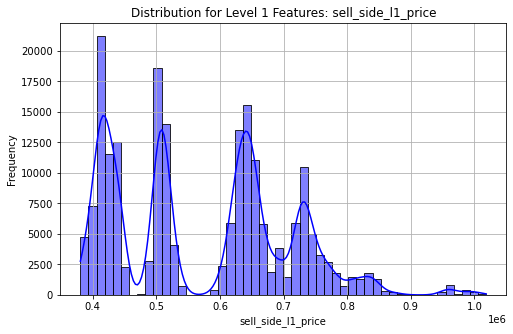

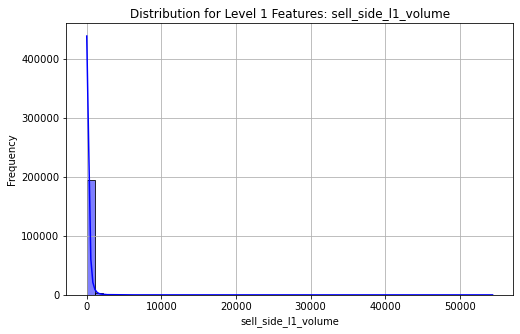

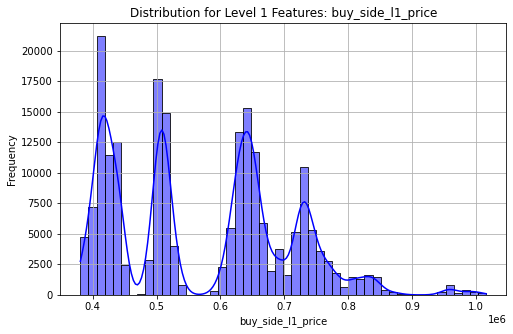

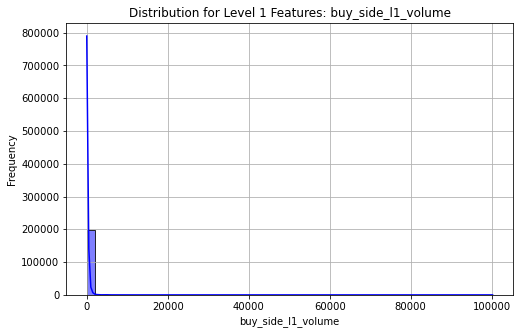

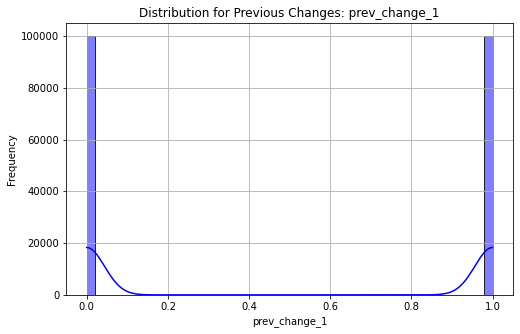

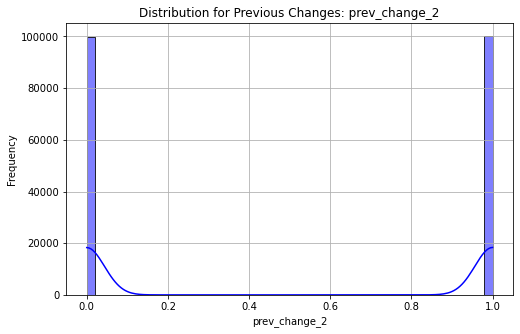

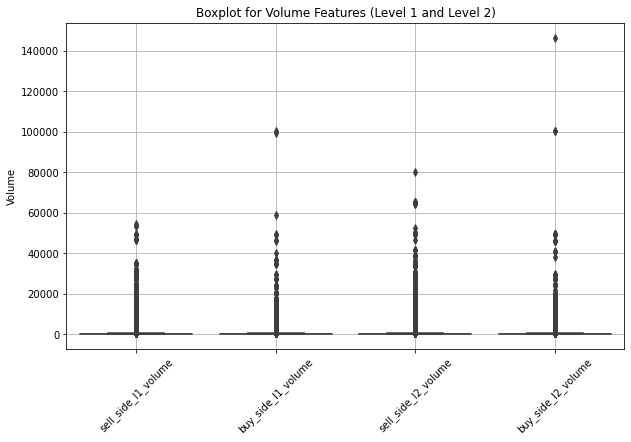

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution for volume & price for level 1 (buy and sell)
def plot_distributions(data, features, title):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[feature], kde=True, color='blue', bins=50)
        plt.title(f"{title}: {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

# Features for volume and price for level 1
level_1_features = ["sell_side_l1_price", "sell_side_l1_volume", "buy_side_l1_price", "buy_side_l1_volume"]
plot_distributions(data, level_1_features, title="Distribution for Level 1 Features")

# Features for prev_change 1 & 2
prev_changes = ["prev_change_1", "prev_change_2"]
plot_distributions(data, prev_changes, title="Distribution for Previous Changes")

# Boxplot for volume level 1 and level 2 (buy and sell)
boxplot_features = [
    "sell_side_l1_volume", "buy_side_l1_volume",
    "sell_side_l2_volume", "buy_side_l2_volume"
]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[boxplot_features])
plt.title("Boxplot for Volume Features (Level 1 and Level 2)")
plt.xticks(range(len(boxplot_features)), boxplot_features, rotation=45)
plt.ylabel("Volume")
plt.grid(True)
plt.show()


Let see the proportion of volume values that are greater than $10^4$. 

In [14]:
volume_features = [col for col in data.columns if "volume" in col]
proportions = {}
threshold = 10**4
for feature in volume_features:
    total_values = len(data[feature])
    values_above_threshold = (data[feature] > threshold).sum()
    proportions[feature] = values_above_threshold / total_values
for feature, proportion in proportions.items():
    print(f"Feature: {feature}, Proportion of values > 10^4: {100*proportion:.2%}")


Feature: sell_side_l1_volume, Proportion of values > 10^4: 5.45%
Feature: buy_side_l1_volume, Proportion of values > 10^4: 5.65%
Feature: sell_side_l2_volume, Proportion of values > 10^4: 9.05%
Feature: buy_side_l2_volume, Proportion of values > 10^4: 8.70%
Feature: sell_side_l3_volume, Proportion of values > 10^4: 8.45%
Feature: buy_side_l3_volume, Proportion of values > 10^4: 8.25%
Feature: sell_side_l4_volume, Proportion of values > 10^4: 10.50%
Feature: buy_side_l4_volume, Proportion of values > 10^4: 6.50%


In this coursework, we want to predict midprice change direction based on data that has no time series structur. Thus, we might want to remove the extreme volume values from our training set. Let see how it goes.

In [15]:
volume_features = [col for col in data.columns if "volume" in col]
threshold = 10**4
truncated_data_set = data[~data[volume_features].gt(threshold).any(axis=1)].copy()
rows_removed = len(data) - len(truncated_data_set)
print(f"Rows removed: {rows_removed}")
print(f"Remaining rows: {len(truncated_data_set)}")

Rows removed: 931
Remaining rows: 199069


# 1°) First naive model: Intuitive LOB

The idea of this basic model is based on a simple economic idea: if the BUY volume is greater than the SELL volume, the price will rise. There is many volume columns so we will try different features and see which one is the best for predicting the price change. 
There is different way to see it, we can look at first order book level to have a primitive intuition of market bevaior, or we can treat all the information given by data set and look at all the volume by summing them. We assume that the levels follow each other in order, as suggested by the project statement. This allows us to sum them. 

In [16]:
data_transformed = data.copy()

# Add total sell and buy volumes for combined levels (L1 to L4)
data_transformed["Total_Sell_Volume"] = (
    data_transformed["sell_side_l1_volume"] + data_transformed["sell_side_l2_volume"] + 
    data_transformed["sell_side_l3_volume"] + data_transformed["sell_side_l4_volume"]
)

data_transformed["Total_Buy_Volume"] = (
    data_transformed["buy_side_l1_volume"] + data_transformed["buy_side_l2_volume"] + 
    data_transformed["buy_side_l3_volume"] + data_transformed["buy_side_l4_volume"]
)

# Add ratio
data_transformed["Volume_Ratio"] = (
    data_transformed["Total_Sell_Volume"] / 
    (data_transformed["Total_Sell_Volume"] + data_transformed["Total_Buy_Volume"])
)

# Add individual levels and combinations
combinations = {
    "L1": ["sell_side_l1_volume", "buy_side_l1_volume"],
    "L2": ["sell_side_l2_volume", "buy_side_l2_volume"],
    "L3": ["sell_side_l3_volume", "buy_side_l3_volume"],
    "L4": ["sell_side_l4_volume", "buy_side_l4_volume"],
    "1+2": ["sell_side_l1_volume", "sell_side_l2_volume", "buy_side_l1_volume", "buy_side_l2_volume"],
    "1+2+3": ["sell_side_l1_volume", "sell_side_l2_volume", "sell_side_l3_volume", 
              "buy_side_l1_volume", "buy_side_l2_volume", "buy_side_l3_volume"],
    "1+2+3+4": ["sell_side_l1_volume", "sell_side_l2_volume", "sell_side_l3_volume", "sell_side_l4_volume", 
                "buy_side_l1_volume", "buy_side_l2_volume", "buy_side_l3_volume", "buy_side_l4_volume"]
}

# Calculate total sell and buy volumes for each combination
for key, columns in combinations.items():
    sell_columns = [col for col in columns if "sell" in col]
    buy_columns = [col for col in columns if "buy" in col]
    
    data_transformed[f"Total_Sell_Volume_{key}"] = data_transformed[sell_columns].sum(axis=1)
    data_transformed[f"Total_Buy_Volume_{key}"] = data_transformed[buy_columns].sum(axis=1)
    data_transformed[f"Volume_Ratio_{key}"] = (
        data_transformed[f"Total_Sell_Volume_{key}"] /
        (data_transformed[f"Total_Sell_Volume_{key}"] + data_transformed[f"Total_Buy_Volume_{key}"])
    )

data_transformed.head()


,label,sell_side_l1_price,sell_side_l1_volume,buy_side_l1_price,buy_side_l1_volume,sell_side_l2_price,sell_side_l2_volume,buy_side_l2_price,buy_side_l2_volume,sell_side_l3_price,...,Volume_Ratio_L4,Total_Sell_Volume_1+2,Total_Buy_Volume_1+2,Volume_Ratio_1+2,Total_Sell_Volume_1+2+3,Total_Buy_Volume_1+2+3,Volume_Ratio_1+2+3,Total_Sell_Volume_1+2+3+4,Total_Buy_Volume_1+2+3+4,Volume_Ratio_1+2+3+4
0,1,693200.0,126,692800.0,110,693300.0,50,692700.0,165,693400.0,...,0.166667,176,275,0.390244,413,325,0.559621,463,575,0.446050
1,0,650400.0,501,650200.0,106,650500.0,245,650100.0,259,650600.0,...,0.337321,746,365,0.671467,894,693,0.563327,1035,970,0.516209
2,1,636200.0,153,635800.0,150,636300.0,100,635700.0,15,636400.0,...,0.343137,253,165,0.605263,403,275,0.594395,508,476,0.516260
3,0,724800.0,4,724500.0,14,724900.0,50,724300.0,312,725100.0,...,0.871264,54,326,0.142105,204,426,0.323810,583,482,0.547418
4,0,622900.0,110,622700.0,100,623000.0,523,622600.0,300,623100.0,...,0.751553,633,400,0.612778,1071,649,0.622674,1676,849,0.663762


We can then compute the accuracies for the LOB ratio model 

In [17]:
accuracies = {}
ratios = ["Volume_Ratio"] + [f"Volume_Ratio_{key}" for key in combinations.keys()]
for ratio in ratios:
    # prediction based on ratio
    prediction_column = f"Prediction_{ratio}"
    data_transformed[prediction_column] = (data_transformed[ratio] < 0.5).astype(int)
    accuracy = accuracy_score(data_transformed["label"], data_transformed[prediction_column])
    accuracies[ratio] = accuracy
for ratio, accuracy in accuracies.items():
    print(f"Accuracy for {ratio}: {accuracy:.4f}")


Accuracy for Volume_Ratio: 0.5936
Accuracy for Volume_Ratio_L1: 0.6839
Accuracy for Volume_Ratio_L2: 0.5277
Accuracy for Volume_Ratio_L3: 0.5154
Accuracy for Volume_Ratio_L4: 0.5053
Accuracy for Volume_Ratio_1+2: 0.6352
Accuracy for Volume_Ratio_1+2+3: 0.6097
Accuracy for Volume_Ratio_1+2+3+4: 0.5936


We conclude that the level 1 volume is enough to get an accuracy of 0.68 which is already an arbitrage in itself. Now this analysis highlights that the information is not equally distributed among the dataset. This suggests to perform a dimension reduction using PCA. The accuracy we want to beat with our Deep Learning Model is set at 0.68. First we will try a model that uses SHAP values analysis to see which features are the most important.

# 2°) SHAP values analysis

The Shap values analysis allow us to have an idea of each feature's importance, for this we gonna take a basic deep learning model and use a small sample of data in order to have a decent execution speed. The aim is not to make good predictions but to have an "importance ranking".


Epoch 1/10


/Users/arthur/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5727 - loss: 1.8980
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5894 - loss: 1.4443
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6171 - loss: 1.1954
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6425 - loss: 1.0150
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6501 - loss: 0.8933
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - loss: 0.8268
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6690 - loss: 0.7702
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6836 - loss: 0.7215
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - loss: 0.6978
Epoch 10/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - loss: 0.6689
Elapsed Time: 0.11 minutes
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 7s 996us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6532/6532 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

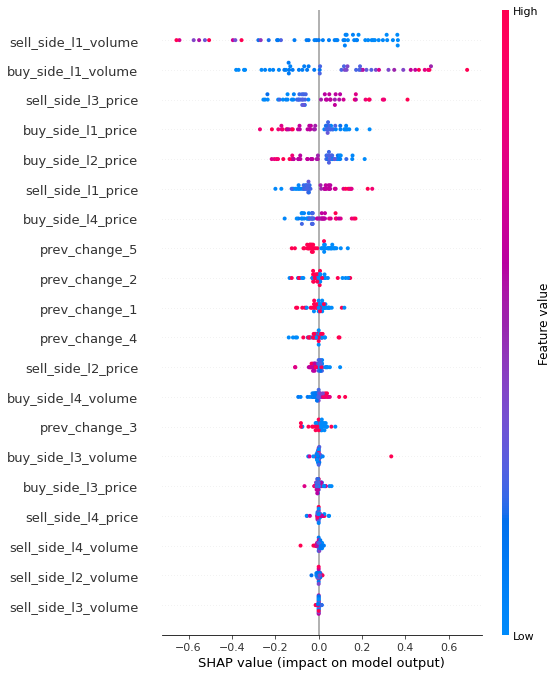

In [18]:
data = pd.read_csv(DATA_PATH, header=None) 

COLUMN_NAMES = [
    "label",
    "sell_side_l1_price", "sell_side_l1_volume",
    "buy_side_l1_price", "buy_side_l1_volume",
    "sell_side_l2_price", "sell_side_l2_volume",
    "buy_side_l2_price", "buy_side_l2_volume",
    "sell_side_l3_price", "sell_side_l3_volume",
    "buy_side_l3_price", "buy_side_l3_volume",
    "sell_side_l4_price", "sell_side_l4_volume",
    "buy_side_l4_price", "buy_side_l4_volume",
    "prev_change_1", "prev_change_2", "prev_change_3", 
    "prev_change_4", "prev_change_5"
]

data.columns = COLUMN_NAMES
data.describe()

X = data.iloc[:, 1:].values  # features
y = data.iloc[:, 0].values   # labels
# Normalize the features: crucial if we want to apply PCA later on
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_sample, y_sample = resample(X, y, n_samples=5000, random_state=42)
def build_model(units=64, learning_rate=0.001, dropout_rate=0.3):
    model = Sequential([
        Dense(units, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_sample.shape[1],)),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(units // 2, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model
best_params = {
    'model__units': 128,
    'model__learning_rate': 0.001,
    'model__dropout_rate': 0.3,
    'epochs': 10,
    'batch_size': 32
}
best_model = KerasClassifier(
    model=build_model,
    model__units=best_params['model__units'],
    model__learning_rate=best_params['model__learning_rate'],
    model__dropout_rate=best_params['model__dropout_rate'],
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1
)
start_time = time.time()
# train
best_model.fit(X_sample, y_sample)
elapsed_time = time.time() - start_time
print(f"Elapsed Time: {elapsed_time / 60:.2f} minutes")
# SHAP feature importance
explainer = shap.KernelExplainer(best_model.predict, shap.sample(X_sample, 100))
shap_values = explainer.shap_values(X_sample[:50]) 
feature_names = np.array(COLUMN_NAMES[1:]) 
shap.summary_plot(shap_values, X_sample[:50], feature_names=feature_names)

We see that the first levels information are the most important features and that the past changes are also signifactive. We notice also that the volume features for level 2,3 4 are not really important which follows our intuition that we got from the LOB model. An idea would be to test a dataset where we only keep the volume features for level 1, but a better way to implement this idea is to do a PCA, we will reduce the number of features and keep the whole variance information.

# 3°) PCA analysis

In [22]:
data = pd.read_csv(DATA_PATH, header=None) 
data.columns = COLUMN_NAMES

X = data.drop(columns=["label"])
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
n_components = 14
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)  
X_test_pca = pca.transform(X_test_scaled)       
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio for each component: {explained_variance_ratio}")
cumulative_variance = explained_variance_ratio.cumsum()
print(f"Cumulative explained variance: {cumulative_variance}")

Explained variance ratio for each component: [0.39409315 0.09961686 0.06898437 0.04410975 0.04373939 0.04347362
 0.04117595 0.04089    0.04053797 0.04020227 0.0372587  0.03636626
 0.03607781 0.03347252]
Cumulative explained variance: [0.39409315 0.49371001 0.56269438 0.60680413 0.65054352 0.69401714
 0.73519309 0.77608309 0.81662107 0.85682333 0.89408204 0.9304483
 0.9665261  0.99999862]


# 4°) Deep Learning model: comparing performance of our 3 dataset : PCA , PCA with extreme values removed and normal dataset

First we will find the best hyperparameters with a fixed number of epochs of 30

In [15]:
# Sample 30% of the data
sample_data = data.sample(frac=0.3, random_state=42)
X_sample = sample_data.drop(columns=["label"])
y_sample = sample_data["label"]

# Split the sample into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameters to search
dropouts = [0.1, 0.2, 0.3]
batch_sizes = [20, 50, 100, 200]
neurons = [60, 80, 120, 160, 180, 200]
activations = ['relu', 'leaky_relu']

# To store results
results = []

# Perform grid search
for dropout, batch_size, neuron, activation in product(dropouts, batch_sizes, neurons, activations):
    # Create the model
    model = Sequential()
    model.add(Dense(neuron, input_shape=(X_train_scaled.shape[1],)))
    if activation == 'relu':
        model.add(Dense(neuron, activation='relu'))
    elif activation == 'leaky_relu':
        model.add(Dense(neuron))
        model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(dropout))
    model.add(Dense(neuron // 2, activation=activation if activation == 'relu' else None))
    if activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(dropout))
    model.add(Dense(neuron // 4, activation=activation if activation == 'relu' else None))
    if activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=30,
        batch_size=batch_size,
        verbose=0,
        callbacks=[early_stopping]
    )

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

    # Store results
    results.append({
        "dropout": dropout,
        "batch_size": batch_size,
        "neurons": neuron,
        "activation": activation,
        "test_accuracy": test_accuracy,
        "test_loss": test_loss
    })

# Find the best parameters
best_result = max(results, key=lambda x: x['test_accuracy'])

# Print the best result
print("Best Parameters:")
print(f"Dropout: {best_result['dropout']}")
print(f"Batch Size: {best_result['batch_size']}")
print(f"Neurons: {best_result['neurons']}")
print(f"Activation: {best_result['activation']}")
print(f"Test Accuracy: {best_result['test_accuracy']:.4f}")
print(f"Test Loss: {best_result['test_loss']:.4f}")


/Users/arthur/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/arthur/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Best Parameters:
Dropout: 0.2
Batch Size: 20
Neurons: 160
Activation: relu
Test Accuracy: 0.7153
Test Loss: 0.5439


The parameters are quite logical, but in order to have a reasonable time of speed, we'll set batchsize at 100 and neurons at 128 which is not too far from 160. Now will analyze where to stop the epochs in order to avoid overfitting. 

In [63]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=100, validation_split=0.2, verbose=1)
val_accuracies = history.history['val_accuracy']

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/300


/Users/arthur/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6349 - loss: 0.6286 - val_accuracy: 0.7030 - val_loss: 0.5580
Epoch 2/300
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6976 - loss: 0.5677 - val_accuracy: 0.7040 - val_loss: 0.5585
Epoch 3/300
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7024 - loss: 0.5594 - val_accuracy: 0.7086 - val_loss: 0.5489
Epoch 4/300
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7045 - loss: 0.5553 - val_accuracy: 0.7082 - val_loss: 0.5471
Epoch 5/300
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7039 - loss: 0.5543 - val_accuracy: 0.7085 - val_loss: 0.5457
Epoch 6/300
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7072 - loss: 0.5499 - val_accuracy: 0.7096 - val_loss: 0.5443
Epoch 7/300
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7089 - loss: 0.5476 - val_accuracy: 0.7091 - val_loss: 0.5445
Epoch 8/300
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7053 - loss: 0.5495 - val_

The first epoch from which the validation accuracy does not improve for 10 epochs is: 25
300


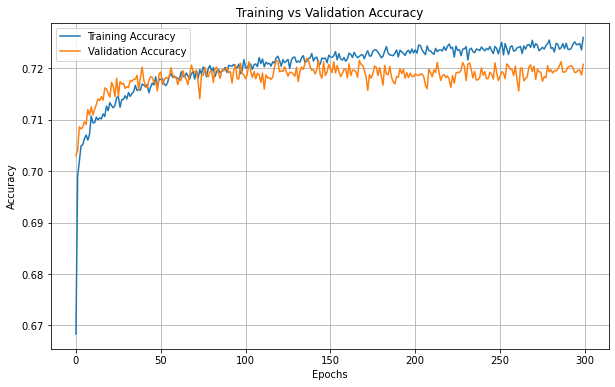

In [64]:
# Find the first epoch where accuracy does not improve for 5 epochs
patience = 10  # Number of epochs to check for no improvement
best_epoch = 0
no_improvement_epochs = 0

for epoch in range(1, len(val_accuracies)):
    if val_accuracies[epoch] > val_accuracies[best_epoch]:
        best_epoch = epoch
        no_improvement_epochs = 0  # Reset counter if accuracy improves
    else:
        no_improvement_epochs += 1

    if no_improvement_epochs >= patience:
        first_epoch_no_improve = epoch - patience + 1
        break
else:
    # If no such epoch is found, set to None
    first_epoch_no_improve = None

if first_epoch_no_improve is not None:
    print(f"The first epoch from which the validation accuracy does not improve for {patience} epochs is: {first_epoch_no_improve}")
else:
    print(f"Validation accuracy improved consistently throughout the training.")
print(len(val_accuracies))
# Existing code for plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


The validation set accuracy does not improve after epoch 25, but we see on the graph that the curve of validation set accuracy meet the curve of train set accuracy at epoch 50, so we will take this number as the reference for next models. 
We tried different models with different number of layers and concluded that the best model contain 3 layers. 
The pyramidal construction is important in a deep learning model in order to progressively reduce the number parameters to extract the most abstract and important features, this also avoid overfitting.

In [23]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',      # Metric to monitor (e.g., validation loss)
    patience=10,              # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore weights of the best epoch
)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=100, validation_split=0.2, verbose=1,callbacks=[early_stopping])
val_accuracies = history.history['val_accuracy']

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50


/Users/arthur/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6430 - loss: 0.6249 - val_accuracy: 0.7015 - val_loss: 0.5582
Epoch 2/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6966 - loss: 0.5675 - val_accuracy: 0.7048 - val_loss: 0.5548
Epoch 3/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7008 - loss: 0.5612 - val_accuracy: 0.7062 - val_loss: 0.5492
Epoch 4/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7018 - loss: 0.5584 - val_accuracy: 0.7044 - val_loss: 0.5497
Epoch 5/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7035 - loss: 0.5536 - val_accuracy: 0.7077 - val_loss: 0.5487
Epoch 6/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7077 - loss: 0.5496 - val_accuracy: 0.7085 - val_loss: 0.5445
Epoch 7/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7073 - loss: 0.5496 - val_accuracy: 0.7082 - val_loss: 0.5424
Epoch 8/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7097 - loss: 0.5464 - val_accurac

## Adding PCA

We use the first 13 components of the data set, it keeps 96% of the variance estimation and shows better result on test set, it follows the conlusion we made in the first part of the notebook that suggest that extreme values reduce the global precision of the model.

In [31]:
data = pd.read_csv(DATA_PATH, header=None) 
data.columns = COLUMN_NAMES

X = data.drop(columns=["label"])
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
n_components = 14
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)  
X_test_pca = pca.transform(X_test_scaled)       
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio for each component: {explained_variance_ratio}")
cumulative_variance = explained_variance_ratio.cumsum()
print(f"Cumulative explained variance: {cumulative_variance}")

Explained variance ratio for each component: [0.39409315 0.09961686 0.06898437 0.04410975 0.04373939 0.04347362
 0.04117595 0.04089    0.04053797 0.04020227 0.0372587  0.03636626
 0.03607781 0.03347252]
Cumulative explained variance: [0.39409315 0.49371001 0.56269438 0.60680413 0.65054352 0.69401714
 0.73519309 0.77608309 0.81662107 0.85682333 0.89408204 0.9304483
 0.9665261  0.99999862]


In [32]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',      # Metric to monitor (e.g., validation loss)
    patience=10,              # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore weights of the best epoch
)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pca, y_train, epochs=50, batch_size=100, validation_split=0.2, verbose=1,callbacks=[early_stopping])
test_loss, test_accuracy = model.evaluate(X_test_pca, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50


/Users/arthur/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6338 - loss: 0.6327 - val_accuracy: 0.7028 - val_loss: 0.5615
Epoch 2/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6931 - loss: 0.5732 - val_accuracy: 0.7052 - val_loss: 0.5550
Epoch 3/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7029 - loss: 0.5608 - val_accuracy: 0.7058 - val_loss: 0.5513
Epoch 4/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7050 - loss: 0.5560 - val_accuracy: 0.7081 - val_loss: 0.5481
Epoch 5/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7026 - loss: 0.5563 - val_accuracy: 0.7078 - val_loss: 0.5476
Epoch 6/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7042 - loss: 0.5526 - val_accuracy: 0.7082 - val_loss: 0.5466
Epoch 7/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7072 - loss: 0.5505 - val_accuracy: 0.7092 - val_loss: 0.5440
Epoch 8/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7093 - loss: 0.5479 - val_accurac

We will now compute the prediction on the selected data set where volume features are above 10^4

In [17]:
threshold = 10**4
# Create a mask for rows in X_test where any volume feature exceeds the threshold
extreme_test_mask = X[volume_features].gt(threshold).any(axis=1)

# Extract extreme test dataset
X_extreme_test = X[extreme_test_mask].copy()
y_extreme_test = y[extreme_test_mask].copy()

# Print information about the extreme test dataset
print(f"Rows in extreme test data: {len(X_extreme_test)}")
print(f"Remaining rows in test data after extracting extremes: {len(X_test) - len(X_extreme_test)}")

# Optionally: scale and transform the extreme test dataset using PCA
X_extreme_test_scaled = scaler.transform(X_extreme_test)
X_extreme_test_pca = pca.transform(X_extreme_test_scaled)

# Print a sample of the extreme test data after PCA
print(f"Sample of extreme test data after PCA: {X_extreme_test_pca[:5]}")

Rows in extreme test data: 931
Remaining rows in test data after extracting extremes: 39069
Sample of extreme test data after PCA: [[  2.56889433   5.21915254   0.49244078  -1.35509404  -2.88831554
    2.56545973  -3.72694582   5.53830471   9.77978981  -2.10376237
   -5.77322096  -0.51443365   1.34807162  -1.96701523]
 [ -0.02911856   4.95320425  -0.89219001  -4.96982414  -4.49442103
    3.30785434   3.00137643  -0.29406107  -5.77366445   8.09974307
   -6.80846177   1.07026513   1.44313394  -0.35988546]
 [  1.10605589   3.89530731   0.41522836  -1.43495473  -2.32200255
    4.47367147  -3.84370688   3.16001289   8.33880337  -1.41031901
   -5.46247912  -0.67346032   1.35190323  -1.54156259]
 [ -0.64443873  10.06802808  -0.78994967  -2.06650224  -1.03325489
    1.52355322   1.99541632  -4.08342104  -6.64093322   0.59381421
   -6.37752559  -6.27029876  -0.4266666   -4.84495502]
 [ -0.66714722   9.92284829  -0.76616731  -7.47797399  -9.62446484
    5.27185441   4.14224725   0.93190972  -5.2

In [19]:
test_loss, test_accuracy = model.evaluate(X_extreme_test_pca, y_extreme_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.5399
Test Accuracy: 0.6917


## Keep PCA and remove extreme values 

In [33]:
from sklearn.model_selection import train_test_split

# Split data into features and target
X = data.drop(columns=["label"])
y = data["label"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Select volume features (columns containing "volume")
volume_features = [col for col in data.columns if "volume" in col]

# Define the threshold
threshold = 10**4

# Delete rows in X_train where any volume feature exceeds the threshold
train_mask = ~X_train[volume_features].gt(threshold).any(axis=1)
X_train_filtered = X_train[train_mask].copy()
y_train_filtered = y_train[train_mask].copy()

# Print the number of rows removed
rows_removed = len(X_train) - len(X_train_filtered)
print(f"Rows removed from training data: {rows_removed}")
print(f"Remaining rows in training data: {len(X_train_filtered)}")
print(f"Remaining rows in test data: {len(X_test)}")



# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test)


Rows removed from training data: 733
Remaining rows in training data: 159267
Remaining rows in test data: 40000


In [34]:
# Set the number of components to keep
n_components = 14  # Adjust this to the number of principal components you want

# Apply PCA to training data
pca = PCA(n_components=n_components)
X_train_pca_truncated = pca.fit_transform(X_train_scaled)  # Fit PCA on training data and transform it
X_test_pca = pca.transform(X_test_scaled)        # Transform test data using the same PCA

# Print explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio for each component: {explained_variance_ratio}")

# Print cumulative explained variance to evaluate how much information is retained
cumulative_variance = explained_variance_ratio.cumsum()
print(f"Cumulative explained variance: {cumulative_variance}")

Explained variance ratio for each component: [0.42374903 0.06904991 0.06851107 0.04454201 0.04406271 0.04267288
 0.0410226  0.04096148 0.04010774 0.03889954 0.03781049 0.03693265
 0.03616703 0.0355095 ]
Cumulative explained variance: [0.42374903 0.49279894 0.56131002 0.60585203 0.64991474 0.69258762
 0.73361022 0.7745717  0.81467944 0.85357897 0.89138946 0.92832211
 0.96448914 0.99999863]


In [35]:


# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca_truncated.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu', input_shape=(X_train_pca_truncated.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',      # Metric to monitor (e.g., validation loss)
    patience=15,              # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore weights of the best epoch
)
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pca_truncated, y_train_filtered, epochs=70, batch_size=100, validation_split=0.2, verbose=1,callbacks=[early_stopping])
val_accuracies = history.history['val_accuracy']

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_pca, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



Epoch 1/70


/Users/arthur/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1275/1275 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6529 - loss: 0.6120 - val_accuracy: 0.7040 - val_loss: 0.5573
Epoch 2/70
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6986 - loss: 0.5656 - val_accuracy: 0.7072 - val_loss: 0.5534
Epoch 3/70
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7027 - loss: 0.5584 - val_accuracy: 0.7054 - val_loss: 0.5531
Epoch 4/70
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7044 - loss: 0.5557 - val_accuracy: 0.7075 - val_loss: 0.5476
Epoch 5/70
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7058 - loss: 0.5528 - val_accuracy: 0.7084 - val_loss: 0.5457
Epoch 6/70
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7065 - loss: 0.5513 - val_accuracy: 0.7095 - val_loss: 0.5445
Epoch 7/70
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7084 - loss: 0.5506 - val_accuracy: 0.7065 - val_loss: 0.5443
Epoch 8/70
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7106 - loss: 0.5463 - val_accurac

We have an improved accuracy, lets build a model that uses bagging and try to capture more information in the dataset. We will keep the truncated data set as it makes improved results. 

the idea of bagging is to have overfit models on many part of the dataset and then make an average prediction using all models, this follows the law of large number. 

Intuitevely, we shall reduce the dropout in order to make the model overfit, increase the number of neurons and the number of epochs, but the more we overfit, the more we need to have models in order to remain in the assumptions of law of large numbers. 

We will then build two models, one using 30 models and the same parameters as before, the interpretation of this model is to have more point of view for the prediction and increase accuracy, and another one with lower dropout, no patience parameter, more neurons and more epochs. We can slightly increase then batchsize in order to increase execution speed.

Lets test the model on a data set that contain only the extreme values 

In [12]:
# Create a mask for rows in X_test where any volume feature exceeds the threshold
extreme_test_mask = X[volume_features].gt(threshold).any(axis=1)

# Extract extreme test dataset
X_extreme_test = X[extreme_test_mask].copy()
y_extreme_test = y[extreme_test_mask].copy()

# Print information about the extreme test dataset
print(f"Rows in extreme test data: {len(X_extreme_test)}")
print(f"Remaining rows in test data after extracting extremes: {len(X_test) - len(X_extreme_test)}")

# Optionally: scale and transform the extreme test dataset using PCA
X_extreme_test_scaled = scaler.transform(X_extreme_test)
X_extreme_test_pca = pca.transform(X_extreme_test_scaled)

# Print a sample of the extreme test data after PCA
print(f"Sample of extreme test data after PCA: {X_extreme_test_pca[:5]}")


Rows in extreme test data: 931
Remaining rows in test data after extracting extremes: 39069
Sample of extreme test data after PCA: [[ -0.932318    -5.72503003  12.78664088   6.63220233  -2.36551331
   -7.39204159  -0.31321648  -6.09697949  -4.6205176   -8.77021086
   -7.36304726   7.26751641  -9.39105582  24.30415293]
 [ -2.35620011  -6.06738609   9.30114688   7.4215395   -3.72322073
   -9.2320879    1.08161754  -2.38845506 -12.12701098   3.35657605
   12.00937327 -11.96902349   9.94743478  -0.95563415]
 [ -1.70589774  -4.6480217   10.18039867   8.26528849  -2.56006661
   -6.69905134  -2.06887054  -4.70866955  -5.27446591  -7.70917796
   -5.41020416   6.04199444  -7.19111836  21.2441506 ]
 [ -5.83507064  -9.00720016  16.7038033    5.30007153  -2.20687738
   -7.10592711  -3.07367703   2.84423127  13.15449373  -3.7954998
   17.79991324 -11.07056475   7.08735675   1.8789566 ]
 [ -4.99884493  -6.78965663  14.08580148   3.86673177  -1.22453505
  -12.25432656  -2.45238506  -5.22381115  15.50

In [13]:
test_loss, test_accuracy = model.evaluate(X_extreme_test_pca, y_extreme_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.6963
Test Accuracy: 0.7003


The accuracy is closed from the one we got withtout removing the extreme values in the model, this result shows that extreme values not useful to train the model. We decide to keep the truncated dataset for training bagging. 

## Adding Bagging

In [73]:
n_estimators = 30  # number of models in the ensemble
models = []
predictions = np.zeros((X_test_pca.shape[0], n_estimators))
# we redefine the model because the shape of the train_set has changed since we did the PCA
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca_truncated.shape[1],)),
    Dropout(0.1),
    Dense(64, activation='relu', input_shape=(X_train_pca_truncated.shape[1],)),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',      # Metric to monitor (e.g., validation loss)
    patience=10,              # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore weights of the best epoch
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
for i in range(n_estimators):
    print(f"Training model {i + 1}/{n_estimators}...")
# create bootstrap sample
    X_train_bootstrap, y_train_bootstrap = resample(X_train_pca_truncated, y_train_filtered, n_samples=len(X_train_pca), random_state=i)
    # train the base model on the bootstrap sample
    model.fit(X_train_bootstrap, y_train_bootstrap, epochs=60, batch_size=200, validation_split=0.2, verbose=1,callbacks=[early_stopping])
    # predict on test set
    predictions[:, i] = model.predict(X_test_pca).flatten()
# aggregate predictions (majority vote)
final_predictions = (np.mean(predictions, axis=1) > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_predictions)
print(f"Bagging ensemble accuracy: {accuracy:.4f}")

/Users/arthur/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model 1/30...
Epoch 1/60
640/640 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6454 - loss: 0.6158 - val_accuracy: 0.7041 - val_loss: 0.5540
Epoch 2/60
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7040 - loss: 0.5583 - val_accuracy: 0.7107 - val_loss: 0.5475
Epoch 3/60
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7067 - loss: 0.5521 - val_accuracy: 0.7126 - val_loss: 0.5438
Epoch 4/60
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7083 - loss: 0.5486 - val_accuracy: 0.7128 - val_loss: 0.5409
Epoch 5/60
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7101 - loss: 0.5476 - val_accuracy: 0.7165 - val_loss: 0.5422
Epoch 6/60
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7118 - loss: 0.5438 - val_accuracy: 0.7145 - val_loss: 0.5410
Epoch 7/60
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7143 - loss: 0.5411 - val_accuracy: 0.7162 - val_loss: 0.5378
Epoch 8/60
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7145 - loss: 0.

We get an accuracy slightly increased accuracy compared to the normal model applied to the truncated training set. We now implement a model designed for overfitting. 

In [ ]:
n_estimators = 100  # number of models in the ensemble
models = []
predictions = np.zeros((X_test_pca.shape[0], n_estimators))
# we redefine the model because the shape of the train_set has changed since we did the PCA
model_bag_overfit = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca_truncated.shape[1],)),
    Dropout(0.05),
    Dense(64, activation='relu', input_shape=(X_train_pca_truncated.shape[1],)),
    Dropout(0.05),
    Dense(64, activation='relu'),
    Dropout(0.05),
    Dense(1, activation='sigmoid')
])


model_bag_overfit.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
for i in range(n_estimators):
    print(f"Training model_bag_overfit {i + 1}/{n_estimators}...")
# create bootstrap sample
    X_train_bootstrap, y_train_bootstrap = resample(X_train_pca_truncated, y_train_filtered, n_samples=len(X_train_pca), random_state=i)
    # train the base model on the bootstrap sample
    model_bag_overfit.fit(X_train_bootstrap, y_train_bootstrap, epochs=100, batch_size=400, validation_split=0.2, verbose=1)
    # predict on test set
    predictions[:, i] = model_bag_overfit.predict(X_test_pca).flatten()
# aggregate predictions (majority vote)
final_predictions = (np.mean(predictions, axis=1) > 0.5).astype(int)
accuracy = accuracy_score(y_test, final_predictions)
print(f"Bagging ensemble accuracy: {accuracy:.4f}")

Training model 1/90...
Epoch 1/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6497 - loss: 0.6118 - val_accuracy: 0.7064 - val_loss: 0.5539
Epoch 2/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7071 - loss: 0.5510 - val_accuracy: 0.7112 - val_loss: 0.5457
Epoch 3/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7110 - loss: 0.5454 - val_accuracy: 0.7143 - val_loss: 0.5431
Epoch 4/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7147 - loss: 0.5413 - val_accuracy: 0.7123 - val_loss: 0.5422
Epoch 5/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7136 - loss: 0.5411 - val_accuracy: 0.7155 - val_loss: 0.5396
Epoch 6/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7153 - loss: 0.5382 - val_accuracy: 0.7151 - val_loss: 0.5389
Epoch 7/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7173 - loss: 0.5363 - val_accuracy: 0.7139 - val_loss: 0.5370
Epoch 8/120
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7166 - 

# Prediction on Data Set B 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset B (replace with the actual path)
data_B = pd.read_csv("PATH_TO_DATASET_B")

# Normalize the feature columns using the same scaler as for training data
X_B_scaled = scaler.transform(data_B)

# Apply the same PCA transformation used for the training data
X_B_pca = pca.transform(X_B_scaled)

# Predict the labels for dataset B using the trained ensemble model
predictions_B = (np.mean([model.predict(X_B_pca).flatten() for _ in range(n_estimators)], axis=0) > 0.5).astype(int)

# Save predictions to a text file
output_filename = "06020137_Nahmias.txt"  # Replace with your CID and surname
np.savetxt(output_filename, predictions_B, fmt='%d')

print(f"Predictions saved to {output_filename}.")
